In [1]:
# In this notebook, we learn how to use scikit-learn to implement simple linear regression.
# We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then,
# we split our data into training and test sets, create a model using training set,
# Evaluate your model using test set, and finally use model to predict unknown value

In [2]:
#***  1.  Import needed packages 
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
# ***2. load data and store in dataframe df: # 
path= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv '
# Same csv file as the Cleaned Auto data file
df = pd.read_csv(path)
df.head()   # head( ) empty argument means first 5 rows by default 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# ****3. Data Exploration
# Lets first have a descriptive exploration on our data.
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [6]:
# Explore some features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,2.0,4,8.5,196,9.9,6.7
1,2.4,4,9.6,221,11.2,7.7
2,1.5,4,5.9,136,6.0,5.8
3,3.5,6,11.1,255,12.7,9.1
4,3.5,6,10.6,244,12.1,8.7
5,3.5,6,10.0,230,11.9,7.7
6,3.5,6,10.1,232,11.8,8.1
7,3.7,6,11.1,255,12.8,9.0
8,3.7,6,11.6,267,13.4,9.5


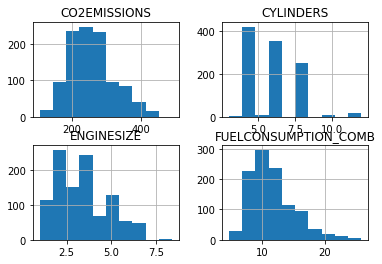

In [7]:
#4. Visulization:  Plot these features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

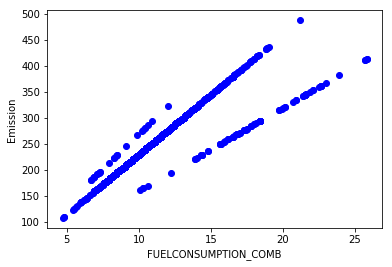

In [8]:
# Now, lets plot each of these features vs the Emission, to see how linear is their relation:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

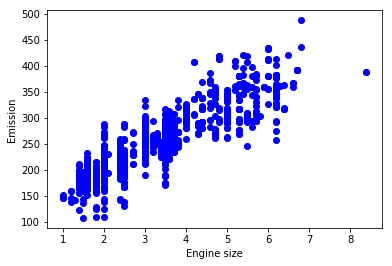

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

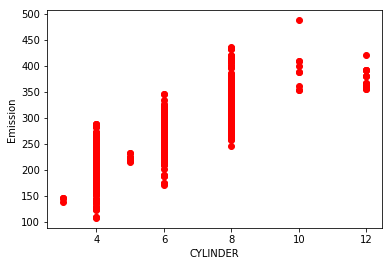

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,color='red')
plt.xlabel("CYLINDER")
plt.ylabel("Emission")
plt.show()


In [11]:
# ******5. Creating train and test dataset
#Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

# This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

# Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.
# We create a mask to select random rows using np.random.rand() function:


In [12]:
# Simple Regression Model
# Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' 
#between the independent x in the dataset, and the dependent y by the linear approximation.

In [13]:
msk = np.random.rand(len(df)) < 0.8
# numpy.random.rand() in Python
# numpy.random.rand(d0, d1, …, dn) : creates an array of specified shape and fills it with random values.
train = cdf[msk]  # 80% for traning
test = cdf[~msk]  # ~msk = 20% for test

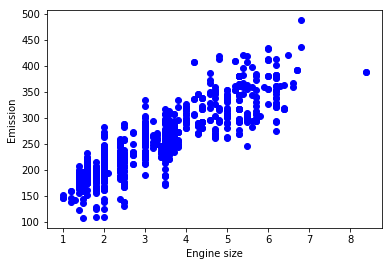

In [14]:
#   5a.  Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
# 6.  Modeling simple LR using regr.fit( )
# Using sklearn package to model data.

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.07421247]]
Intercept:  [125.0744067]


In [17]:
# As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.
# Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are 
# the intercept and slope of the line, sklearn can estimate them directly from our data.
# Notice that all of the data must be available to traverse and calculate the parameters.

In [18]:
# 7. Plot outputs  with prediction yhat = ax + b 
# we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

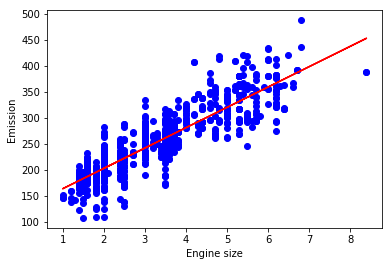

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

# regr.coef_[0][0]*train_x + regr.intercept_[0] = yhat = 39.319024 x + 124.64685076
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [20]:
# 8. Evaluate the model  usimg regr.predict( )
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) ) # r2_score(  )  for R^2 value

Mean absolute error: 22.26
Residual sum of squares (MSE): 889.80
R2-score: 0.68


In [21]:
# - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
# - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. - Root Mean Squared Error (RMSE).
#  - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [22]:
# ******** Multiple Regression Model******
# In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. 
# The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [36]:
# Use the same data from df
# Model the data for MLR 
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) # Multiple variables 
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[10.83585536  7.38188616  9.73952527]]
Intercept:  [64.1532154]


In [37]:
# yhat= 62.20855328+ 11.00321953 x_1 + 7.22393614x_2+9.80306991x_3  # yhat= a0+ a1* x_1+ a2* x_2+a3 *x_3

In [38]:
# Prediction: 
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
# print("Mean absolute error: %.2f" % np.mean(np.absolute(x - y)))

Residual sum of squares: 579.46
Variance score: 0.84


In [26]:
# explained variance regression score:
#If  𝑦̂   is the estimated target output, y the corresponding (correct) target output,
#  and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

#𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂} /𝑉𝑎𝑟{𝑦} 
# The best possible score is 1.0, lower values are worse.

In [27]:
x= round (39.319024, 2 )
x

39.32

In [28]:
# ***Practice: 
# Try to use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
# FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [ ]:
# Slpit data for train and test using np.random.rand(leng(df))< 0.8 
msk = np.random.rand(len(df)) < 0.8
# numpy.random.rand() in Python
# numpy.random.rand(d0, d1, …, dn) : creates an array of specified shape and fills it with random values.
train = cdf[msk]  # 80% for traning
test = cdf[~msk]  # ~msk = 20% for test

In [34]:
# Make a model 
from sklearn import linear_model
regr = linear_model.LinearRegression()
x1 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y1 = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x1, y1) # use train data 
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[10.89110265  6.95675752  6.45182332  2.94278949]]
Intercept:  [65.54952979]


In [ ]:
# yhat= 65.54952979+ 10.89110265* x_1 + 6.95675752*x_2+2.94278949*x_3 

In [33]:
# Prediction and evaluation USING TEST DATA 
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

x2 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y2 = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x2, y2))

Residual sum of squares: 582.86
Variance score: 0.84
